In [1]:
from fenics import *
import numpy as np
import PeriodicBoundary as pb
import Homogenization as hm

#from GeometryBase import GeometryBase 
#gm = 'box_in__box_2d'
#gm = 'diagonal_box_in_box_2d'
#gm = 'straight_channel_2d'
gm = 'diagonal_channels_2d'
#gm = 'perturbed_channel_2d'
#gm = 'vertical_filaments_2d'
#gm = 'circle_in_a_box_2d'
#gm = 'four_boxes_in_a_box_2d'

#gm = 'extended_box_3d'
#gm = 'crossing_filaments_3d'
#gm = 'box_in_a_box_3d'

#gm = 'crossing_channels_2d'

if gm == 'box_in__box_2d':
    import GeometryBoxInABox2D as Geometry
elif gm == 'four_boxes_in_a_box_2d':
    import GeometryFourBoxesInABox2D as Geometry
elif gm == 'straight_channel_2d':
    import GeometryStraightChannel2D as Geometry
elif gm == 'perturbed_channel_2d':
    import GeometryPerturbedChannel2D as Geometry
elif gm == 'vertical_filaments_2d':
    import GeometryVerticalFilaments2D as Geometry
elif gm == 'diagonal_channels_2d':
    import GeometryDiagonalChannels2D as Geometry
elif gm == 'crossing_channels_2d':
    import GeometryCrossingChannels2D as Geometry
elif gm == 'diagonal_box_in_box_2d':
    import GeometryDiagonalBoxInABox2D as Geometry
elif gm == 'circle_in_a_box_2d':
    import GeometryCircleInABox2D as Geometry

# 3D meshes
elif gm == 'extended_box_3d':
    import GeometryExtendedBox3D as Geometry
elif gm == 'crossing_filaments_3d':
    import GeometryCrossingFilaments3D as Geometry
elif gm == 'box_in_a_box_3d':
    import GeometryBoxInABox3D as Geometry


In [2]:
import importlib
importlib.reload(Geometry)
importlib.reload(hm)

<module 'Homogenization' from '/home/eberhardt/Spine/Git_code/homogenization/code/Homogenization.py'>

In [34]:

geom = Geometry.Geometry(2., 1., resolution=36, ds=36., sc=18.)

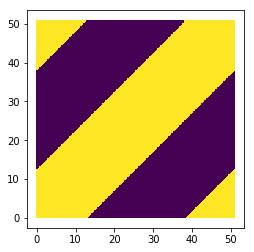

In [35]:
if geom.geometric_dimension() == 2:
    materials = geom.get_materials()
    plot(materials)
else:
    pass

In [36]:
geom.save_materials()
geom.save_boundaries()
geom.save_permittivity()
# geom.test_grid_periodicity('x_1')

In [37]:
mesh = geom.get_mesh()
liquid_mesh = geom.get_liquid_mesh()

In [38]:
xi_phi = hm.reference_cell_solver_potential(geom)

folder = geom.get_folder()

# Save solution in VTK format
file = File(folder + "xi_phi_1.pvd")
file << xi_phi[0]
file = File(folder + "xi_phi_2.pvd")
file << xi_phi[1]
if mesh.geometric_dimension() == 3:
    file = File(folder + "xi_phi_3.pvd")
    file << xi_phi[2]

In [39]:
xi_c = hm.reference_cell_solver_diffusion(geom)

folder = geom.get_folder()

# Save solution in VTK format
file = File(folder + "xi_c_1.pvd")
file << xi_c[0]
file = File(folder + "xi_c_2.pvd")
file << xi_c[1]
if mesh.geometric_dimension() == 3:
    file = File(folder + "xi_c_3.pvd")
    file << xi_c[2]

In [40]:
D = 1.
pourosity = 1.

diffusion_tensor = D * pourosity * hm.diffusion_tensor(xi_c, geom)
print(diffusion_tensor)

Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
[[0.52777778 0.47222222]
 [0.47222222 0.52777778]]


In [15]:
permittivity_tensor = hm.permittivity_tensor(xi_phi, geom)
print(permittivity_tensor)

Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
[[1.75374813e+00 1.01550011e-04]
 [1.01550011e-04 1.75374813e+00]]


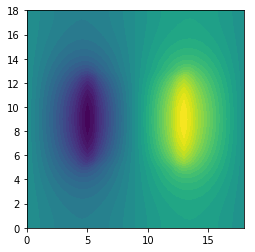

In [16]:
plot(xi_phi[0])

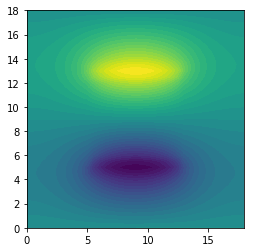

In [17]:
plot(xi_phi[1])

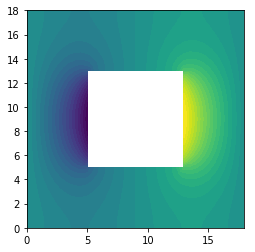

In [18]:
plot(xi_c[0])

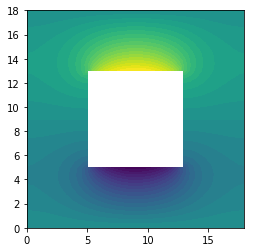

In [19]:
plot(xi_c[1])

In [20]:
print(folder)

./../box_in_a_box_2D/


In [21]:
print(liquid_mesh.num_cells())

2080


In [22]:
print(geom.get_liquid_mesh_volume())

260.0


In [23]:
print(geom.get_mesh_volume())

324.0


In [24]:
print('solid mesh voluem: ',geom.get_mesh_volume()-geom.get_liquid_mesh_volume())

solid mesh voluem:  64.0


In [25]:
pourosity = geom.get_liquid_mesh_volume()/geom.get_mesh_volume()
print('pourosity: ',geom.get_liquid_mesh_volume()/geom.get_mesh_volume())

pourosity:  0.8024691358024691


In [29]:
# save data 'geometry' 'eps_l' 'eps_s' 'res_x' 'res_y' 'res_z' 'pourosity' 'domain_size' 'solid_size' 'date'

import datetime
now = datetime.datetime.now()
date = now.isoformat()

pourosity = geom.get_liquid_mesh_volume()/geom.get_mesh_volume()

results_list = [gm, geom.eps_l, geom.eps_s, geom.res, geom.res_y, geom.res_z, pourosity, geom.domain_size, geom.solid_scale, date]

import pickle
all_results = pickle.load(file=open('./../results/homogenization_results.pcl', 'rb'))
all_results.append(results_list)
pickle.dump(all_results, file=open('./../results/homogenization_results.pcl', 'wb')) 

In [89]:
def tensor_vs_resolution(res, eps_l, eps_s, tensors):
    
    geom = Geometry.Geometry(eps_l, eps_s, res)
    
    xi_phi = hm.reference_cell_solver_potential(geom)
    
    xi_c = hm.reference_cell_solver_diffusion(geom)
    
    diffusion_tensor = hm.diffusion_tensor(xi_c, geom)
    
    permittivity_tensor = hm.permittivity_tensor(xi_phi, geom)
    
    tmp_dict = {'D': diffusion_tensor, 'P': permittivity_tensor}
    tensors.update({str(res): tmp_dict})
    
tensors = {}
res_list = [20 * i for i in range(1,11)]
eps_l = 2.
eps_s = 1.

for res in res_list:
    tensor_vs_resolution(res, eps_l, eps_s, tensors)


Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing te

In [90]:
tensors

{'20': {'D': array([[ 0.85623328, -0.00622336],
         [-0.00622336,  0.85623328]]),
  'P': array([[ 1.80412491e+00, -7.63703855e-04],
         [-7.63703855e-04,  1.80412491e+00]])},
 '40': {'D': array([[ 0.84731766, -0.00355304],
         [-0.00355304,  0.84731766]]),
  'P': array([[ 1.77990100e+00, -4.78656887e-04],
         [-4.78656887e-04,  1.77990100e+00]])},
 '60': {'D': array([[ 0.84176845, -0.00248335],
         [-0.00248335,  0.84176845]]),
  'P': array([[ 1.76920791e+00, -2.74815493e-04],
         [-2.74815493e-04,  1.76920791e+00]])},
 '80': {'D': array([[ 0.84076188, -0.00189867],
         [-0.00189867,  0.84076188]]),
  'P': array([[ 1.76634945e+00, -2.18733941e-04],
         [-2.18733941e-04,  1.76634945e+00]])},
 '100': {'D': array([[ 0.84003438, -0.00153808],
         [-0.00153808,  0.84003438]]),
  'P': array([[ 1.76447766e+00, -1.81137383e-04],
         [-1.81137383e-04,  1.76447766e+00]])},
 '120': {'D': array([[ 0.83881869, -0.00132252],
         [-0.00132252,  0

In [91]:
d11 = []
d12 = []
d21 = []
d22 = []
p11 = []
p12 = []
p21 = []
p22 = []

for res in res_list:
    D = tensors[str(res)]['D']
    P = tensors[str(res)]['P']
    d11.append(D[0,0])
    d12.append(D[0,1])
    d21.append(D[1,0])
    d22.append(D[1,1])
    p11.append(P[0,0])
    p12.append(P[0,1])
    p21.append(P[1,0])
    p22.append(P[1,1])

/home/eberhardt/anaconda2/envs/fenicsenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/eberhardt/anaconda2/envs/fenicsenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


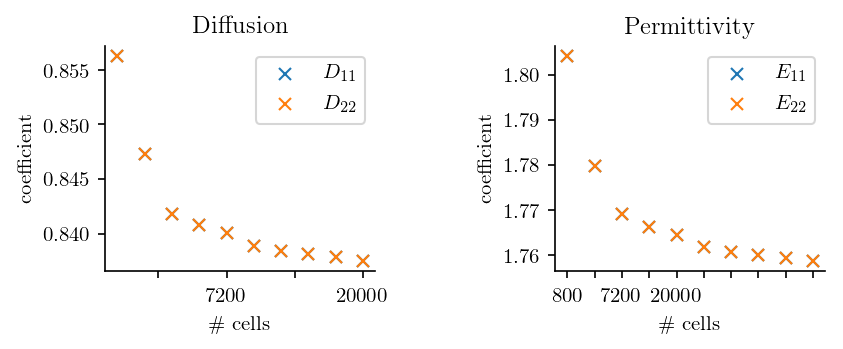

In [92]:
from matplotlib import pyplot as plt
# text rendering with LaTex
plt.rc('text', usetex=True)
plt.rc('font', family='times')

fig = plt.figure(figsize=(6.,  2.), dpi=150)
pos1 = [0.1, 0.1, 0.3, 0.75]
pos2 = [0.6, 0.1, 0.3, 0.75]


sub1 = fig.add_axes(pos1)
sub1.spines['top'].set_visible(False)
sub1.spines['right'].set_visible(False)
sub1.set_xlabel('\# cells')
sub1.set_ylabel('coefficient')
sub1.plot(res_list, d11, 'x', label='$D_{11}$')
#sub1.plot([20,200], [0.3833, 0.3833], '--', color='black', label='Auriault \&\n Lewandowska 1996\n (144 cells)')
#sub1.plot(res_list, d12, 'x', label='$D_{12}$')
sub1.plot(res_list, d22, 'x', label='$D_{22}$')
#sub1.plot(res_list, d21, 'x', label='$D_{21}$')

#sub1.set_xticklabels([str(np.square(res_list[0])*2), '', '', str(np.square(res_list[3])*2),
#                      '', '', str(np.square(res_list[6])*2), '', '', str(np.square(res_list[9])*2)])
sub1.set_xticklabels([str(np.square(res_list[0])*2), '', str(np.square(res_list[2])*2), '', str(np.square(res_list[4])*2)])

sub1.legend()
sub1.set_title('Diffusion')

sub2 = fig.add_axes(pos2)
sub2.spines['top'].set_visible(False)
sub2.spines['right'].set_visible(False)
sub2.set_xlabel('\# cells')
sub2.set_ylabel('coefficient')
sub2.plot(res_list, p11, 'x', label='$E_{11}$')
#sub2.plot([20, 200], [1.5, 1.5], '--', color='black', label='theory')
#sub2.plot([20, 200], [1.333, 1.333], '--', color='black')
#sub2.plot(res_list, p12, 'x', label='$E_{12}$')
sub2.plot(res_list, p22, 'x', label='$E_{22}$')
#sub2.plot(res_list, p21, 'x', label='$E_{21}$')

sub2.set_xticks(res_list)
#sub2.set_xticklabels([str(np.square(res_list[0])*2), '', '', str(np.square(res_list[3])*2),
#                      '', '', str(np.square(res_list[6])*2), '', '', str(np.square(res_list[9])*2)])
sub2.set_xticklabels([str(np.square(res_list[0])*2), '', str(np.square(res_list[2])*2), '', str(np.square(res_list[4])*2)])

sub2.legend()
sub2.set_title('Permittivity')

plt.show()

In [38]:
print(tensors[str(res_list[-1])]['D'])

[[8.87598500e-01 3.66956542e-17]
 [2.37888587e-17 4.03967957e-01]]


In [39]:
print(tensors[str(res_list[-1])]['P'])

[[1.65107543e+00 1.05395786e-05]
 [1.39472679e-05 1.56197337e+00]]


In [40]:
tensors.update({'eps_l': eps_l, 'eps_s': eps_s, 'pourosity':pourosity, 'res_list': res_list})

In [41]:
import pickle
pickle.dump(tensors, open(folder+'tensors_vs_res_'+str(eps_l)+'_'+str(eps_s)+'.pcl', 'wb'))

In [66]:
folder+'tensors_vs_res_'+str(eps_l)+'_'+str(eps_s)+'.obj'

'./../extended_box_3d/tensors_vs_res_2.0_1.0.obj'